# Analysis and insights Python script: Retail market analysis in Barcelona
## Part 1: Gathering the data and creating a database

## Import the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy as sa
import folium

## Gather data

### Airbnb data
The airbnb data is obtained through the following website:
[www.insiderairbnb.com](http://insideairbnb.com/get-the-data/)

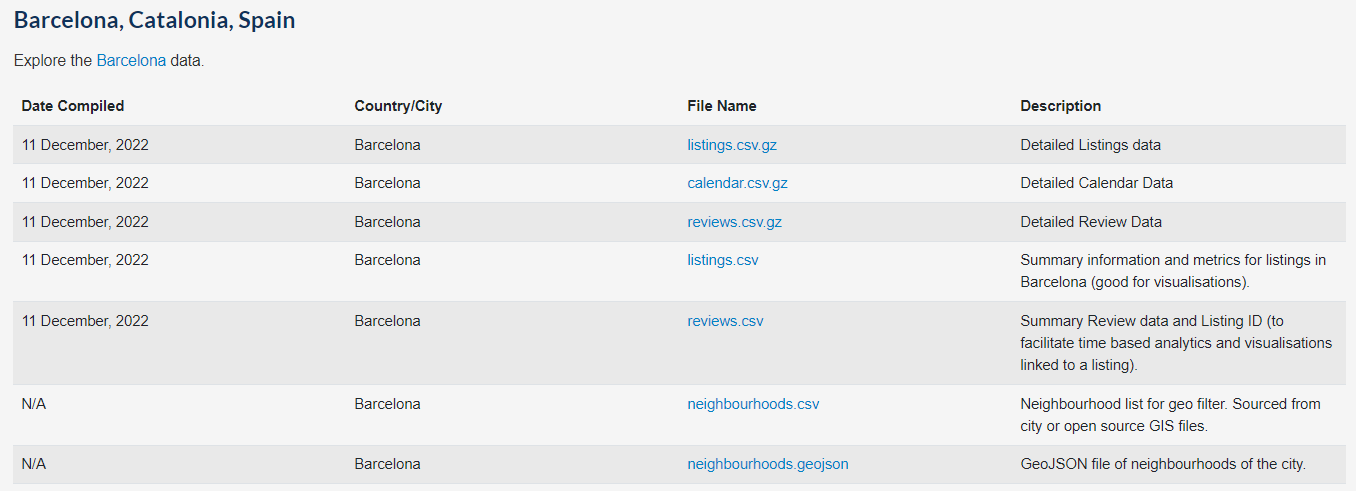

In [1]:
from IPython import display
display.Image("images/airbnb_data_barcelona.png")

There are different data files available for download. For the sake of this project only "listings.csv.gz" and "listings.csv" are used. The other files provide more info about reviews, which could be interesting for doing a sentiment analysis in a different project.

Let's open the aforementioned data files:
### listings.csv

In [3]:
listings = pd.read_csv("data/listings.csv")
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.40556,2.17262,Entire home/apt,129,1,33,2022-10-07,0.28,20,264,11,HUTB-002062
1,23197,"Forum CCIB DeLuxe, Spacious, Elegant ,Christmas",90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.41243,2.21975,Entire home/apt,195,4,65,2022-10-23,0.45,2,255,12,HUTB005057
2,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40566,2.17015,Entire home/apt,73,2,83,2022-12-09,0.60,3,276,20,HUTB-001722
3,34981,VIDRE HOME PLAZA REAL on LAS RAMBLAS,73163,Andres,Ciutat Vella,el Barri Gòtic,41.37978,2.17623,Entire home/apt,174,5,190,2022-11-19,1.28,1,139,30,HUTB-001506
4,36763,In front of the beach,158596,Ester,Ciutat Vella,la Barceloneta,41.38043,2.19094,Private room,36,31,104,2022-10-05,0.76,1,259,19,NaN


In [4]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15778 entries, 0 to 15777
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15778 non-null  int64  
 1   name                            15769 non-null  object 
 2   host_id                         15778 non-null  int64  
 3   host_name                       15776 non-null  object 
 4   neighbourhood_group             15778 non-null  object 
 5   neighbourhood                   15778 non-null  object 
 6   latitude                        15778 non-null  float64
 7   longitude                       15778 non-null  float64
 8   room_type                       15778 non-null  object 
 9   price                           15778 non-null  int64  
 10  minimum_nights                  15778 non-null  int64  
 11  number_of_reviews               15778 non-null  int64  
 12  last_review                     

Conclusions:

- The listings file contains all the useful information we need to carry out the project.

### listings.csv.gz

In [5]:
listings_det = pd.read_csv("data/listings.csv.gz")
listings_det.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,18674,https://www.airbnb.com/rooms/18674,20221211170659,2022-12-11,city scrape,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,https://a0.muscache.com/pictures/13031453/413c...,71615,...,4.69,4.81,4.28,HUTB-002062,t,20,20,0,0,0.28
1,124342,https://www.airbnb.com/rooms/124342,20221211170659,2022-12-11,city scrape,BORN CENTRICO / MUSEO PICASSO / 10 min to BEACH,Double room at El Born / MONTHLY RENTAL & DAY...,NaN,https://a0.muscache.com/pictures/6058611/f5160...,548084,...,4.88,4.95,4.49,HUTB-123456,f,1,0,1,0,0.56
2,128463,https://www.airbnb.com/rooms/128463,20221211170659,2022-12-12,city scrape,Private Suite in residential area!!,My House is located in the quiet district of S...,You live in a typical Spanish district with no...,https://a0.muscache.com/pictures/855084/c71b65...,635253,...,4.90,4.73,4.82,HUTB-012603,t,1,0,1,0,2.53
3,130227,https://www.airbnb.com/rooms/130227,20221211170659,2022-12-11,city scrape,Spacious Room with Pool and Terrace,Just 5 minutes’ walk from the beach in the San...,NaN,https://a0.muscache.com/pictures/14284828/d2ea...,641496,...,4.78,4.73,4.64,Exempt,f,1,0,1,0,1.24
4,135513,https://www.airbnb.com/rooms/135513,20221211170659,2022-12-11,city scrape,APARTMENT AT RAMBLA POBLE NOU AND BEACH,AMAZING APARTMENT AT RAMBLA OF POBLE NOU ; ONL...,NaN,https://a0.muscache.com/pictures/9578738/40581...,664196,...,4.80,4.83,4.56,NaN,f,2,2,0,0,0.96


In [6]:
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15778 entries, 0 to 15777
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            15778 non-null  int64  
 1   listing_url                                   15778 non-null  object 
 2   scrape_id                                     15778 non-null  int64  
 3   last_scraped                                  15778 non-null  object 
 4   source                                        15778 non-null  object 
 5   name                                          15769 non-null  object 
 6   description                                   15698 non-null  object 
 7   neighborhood_overview                         9193 non-null   object 
 8   picture_url                                   15778 non-null  object 
 9   host_id                                       15778 non-null 

Conclusions:

- This file contains the same records than listings but with more columns.
- We can join it with listings by "id" field.

## Creating the database
### We are going to store all the data in a database using SQLite.
Create the connection to the database, create the tables and load them to the database.

In [7]:
con = sa.create_engine("sqlite:///data/airbnb.db")

listings.to_sql("listings", con=con, if_exists="replace")
listings_det.to_sql("listings_det", con=con, if_exists="replace")